In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. INGESTA DE DATOS (Simulamos un archivo 'sucio' de la clínica)

In [12]:
data = {
    'fecha_cita': ['2024-01-15', '2024-01-15', '15/01/2024', '2024-01-16', '2024-01-16', None],
    'especialidad': ['Ginecología', 'Pediatría', 'Ginecología', 'Medicina General', 'Ginecología', 'Pediatría'],
    'paciente_edad': [25, 8, 30, 45, 28, np.nan], # np.nan es un valor nulo
    'estado_cita': ['Atendido', 'Atendido', 'Cancelado', 'Atendido', 'Atendido', 'Programado']
}

print("--- 1. Datos Crudos (Como llegan de la base de datos) ---")
df = pd.DataFrame(data)
display(df)

--- 1. Datos Crudos (Como llegan de la base de datos) ---


,fecha_cita,especialidad,paciente_edad,estado_cita
0,2024-01-15,Ginecología,25.0,Atendido
1,2024-01-15,Pediatría,8.0,Atendido
2,15/01/2024,Ginecología,30.0,Cancelado
3,2024-01-16,Medicina General,45.0,Atendido
4,2024-01-16,Ginecología,28.0,Atendido
5,None,Pediatría,NaN,Programado


## 2. LIMPIEZA Y TRANSFORMACIÓN (ETL) - ¡Aquí está tu valor!

In [13]:
# A. Estandarizar fechas (arreglar el formato mixto)
# Agregamos format='mixed' para decirle que vienen formatos diferentes revueltos
try:
    df['fecha_cita'] = pd.to_datetime(df['fecha_cita'], errors='coerce', dayfirst=True, format='mixed')
except ValueError:
    # Fallback para versiones antiguas de Pandas que no soportan format='mixed'
    df['fecha_cita'] = pd.to_datetime(df['fecha_cita'], errors='coerce', dayfirst=True)

# Verificamos qué filas siguen siendo NaT (Nulas) antes de llenarlas
# Esto es para que TÚ veas si hay fechas que no se pudieron arreglar
print("Fechas que no se pudieron leer (NaT):")
print(df[df['fecha_cita'].isna()])

# B. Llenar vacíos (Imputación)
# Solo llenamos con 'hoy' aquellas que REALMENTE venían vacías o irrecuperables
df['fecha_cita'] = df['fecha_cita'].fillna(pd.Timestamp('today'))

# Si no hay edad, llenamos con el promedio
promedio_edad = df['paciente_edad'].mean()
df['paciente_edad'] = df['paciente_edad'].fillna(promedio_edad)

print("\n--- 2. Datos Limpios (Corregidos) ---")
display(df)

Fechas que no se pudieron leer (NaT):
  fecha_cita especialidad  paciente_edad estado_cita
5        NaT    Pediatría            NaN  Programado

--- 2. Datos Limpios (Corregidos) ---


,fecha_cita,especialidad,paciente_edad,estado_cita
0,2024-01-15 00:00:00.000000,Ginecología,25.0,Atendido
1,2024-01-15 00:00:00.000000,Pediatría,8.0,Atendido
2,2024-01-15 00:00:00.000000,Ginecología,30.0,Cancelado
3,2024-01-16 00:00:00.000000,Medicina General,45.0,Atendido
4,2024-01-16 00:00:00.000000,Ginecología,28.0,Atendido
5,2026-01-05 18:02:04.967226,Pediatría,27.2,Programado


## 3. ANÁLISIS E INSIGHTS (Lo que le importa al gerente)

In [14]:
# Pregunta de negocio: ¿Cuál es la especialidad más demandada?
conteo_especialidad = df['especialidad'].value_counts()

## 4. VISUALIZACIÓN (Matplotlib)

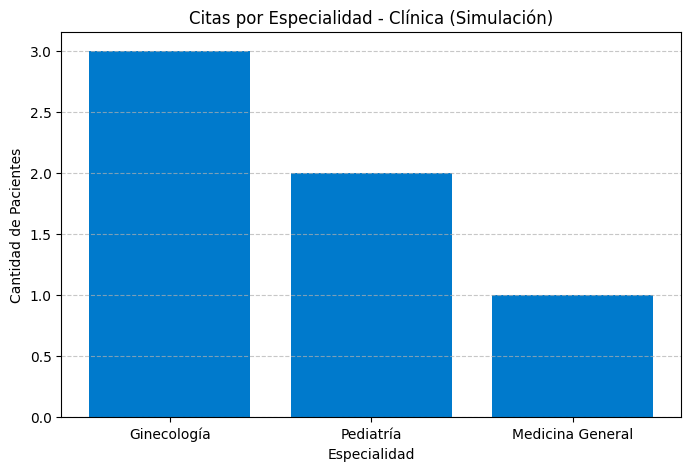

In [16]:
plt.figure(figsize=(8, 5))
plt.bar(conteo_especialidad.index, conteo_especialidad.values, color='#007acc')

plt.title('Citas por Especialidad - Clínica (Simulación)')
plt.xlabel('Especialidad')
plt.ylabel('Cantidad de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()